<a href="https://colab.research.google.com/github/JonathanBath/summer-school/blob/master/Analyse_Umbrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/JonathanBath/summer-school.git

Cloning into 'summer-school'...
remote: Enumerating objects: 147, done.
remote: Total 147 (delta 0), reused 0 (delta 0), pack-reused 147
Receiving objects: 100% (147/147), 11.55 MiB | 15.56 MiB/s, done.
Resolving deltas: 100% (45/45), done.


/content/summer-school/six


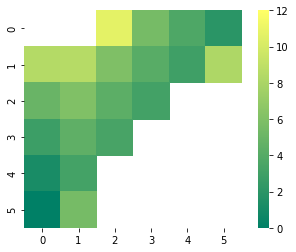

In [143]:
# change directory to 'four', 'five', 'six' for simulations at 30, 40 and 50°C
directory = '/content/summer-school/six'

import pandas as pd
import numpy as np
import seaborn as sns
import os
from functools import reduce

%cd $directory
files = os.listdir();

names = ['Q1','Q2','biased','unbiased','whitespace']

# load all data
data = [pd.read_csv(file, sep=' ', comment='#', names=names).set_index(['Q1','Q2']).drop(['biased','whitespace'], axis=1) for file in files]

# add data for each simulation
data = reduce(lambda x, y: x.add(y, fill_value=0), data)

data = data['unbiased'].to_numpy()
data = data.reshape(6,6)
RT = (1.987 * 303) / 1000 

anticodonWins = data[5,0]

ratio = data/anticodonWins

np.seterr(divide = 'ignore') 
dG = -RT * np.log2(ratio)
sns.heatmap(np.ma.masked_invalid(dG), cmap='summer', vmin=0, vmax=12, square=True);
